In [ ]:
import pandas as pd

## Задача 1.

Поиграемся с датасетом про диабет (он совсем легкий).

In [ ]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
data.info() # нет NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [ ]:
duplicateRows = data[data.duplicated ()] # нет дублирующих строк

In [ ]:
duplicateRows

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)


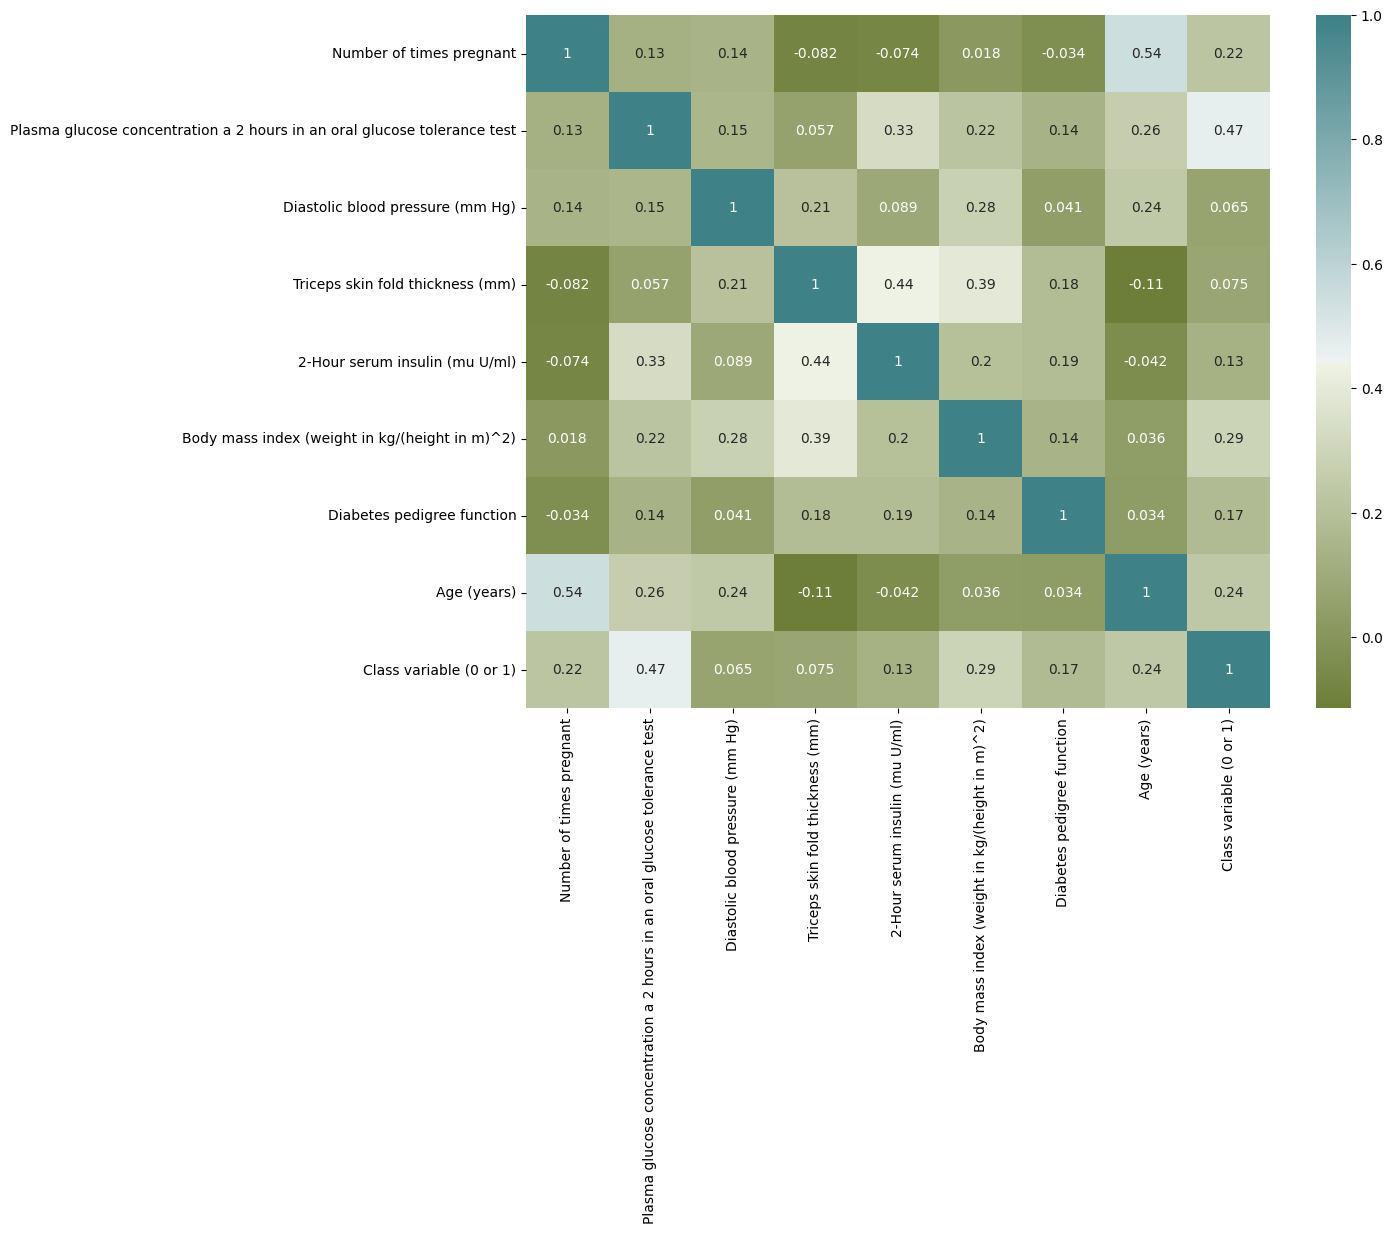

In [ ]:
plt.figure(figsize=(12,9)) # кажется, что нет больших оснований для того, чтобы удалять какие-либо признаки
dataplot = sns.heatmap(data.corr(), cmap=sns.diverging_palette(100,200,as_cmap=True), annot=True)

plt.show()

In [ ]:
X = data.drop('Class variable (0 or 1)', axis=1)
y = data['Class variable (0 or 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
y.value_counts() # выборка не очень сбалансированная, можно будет попытаться сбалансировать классы

0    500
1    268
Name: Class variable (0 or 1), dtype: int64

In [ ]:
# обучаем логистическую регрессию
# видимо, несбалансированность классов дает большую разницу в результатах для классов 0 и 1
# разница в precision заметнее, чем в recall

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.83       417
           1       0.55      0.73      0.63       159

    accuracy                           0.76       576
   macro avg       0.72      0.75      0.73       576
weighted avg       0.79      0.76      0.77       576
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       150
           1       0.57      0.79      0.66        42

    accuracy                           0.82       192
   macro avg       0.75      0.81      0.77       192
weighted avg       0.85      0.82      0.83       192



In [ ]:
# обучаем методом опорных векторов
# несбалансированность классов - большая разница в результатах для классов 0 и 1, разница в precision заметнее, чем в recall
# в общем результаты близкие к регрессии

model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       407
           1       0.57      0.71      0.63       169

    accuracy                           0.76       576
   macro avg       0.72      0.74      0.73       576
weighted avg       0.78      0.76      0.77       576
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       150
           1       0.59      0.81      0.68        42

    accuracy                           0.83       192
   macro avg       0.76      0.82      0.78       192
weighted avg       0.86      0.83      0.84       192



In [ ]:
# пробуем сбалансировать классы
# показатели для классов 0 и 1 стали ближе

model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       325
           1       0.76      0.64      0.69       251

    accuracy                           0.76       576
   macro avg       0.76      0.74      0.75       576
weighted avg       0.76      0.76      0.75       576
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       131
           1       0.64      0.61      0.62        61

    accuracy                           0.77       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



In [ ]:
model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       335
           1       0.74      0.65      0.69       241

    accuracy                           0.76       576
   macro avg       0.76      0.74      0.75       576
weighted avg       0.76      0.76      0.76       576
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       133
           1       0.66      0.64      0.65        59

    accuracy                           0.79       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.79      0.79      0.79       192



## Задача 2.

Второй датасет - про покупателей велосипедов.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


Пытаемся по характеристикам человека понять, купит он велик или нет.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [19]:
data.drop(['ID'], axis=1, inplace=True)

In [20]:
commute = data['Commute Distance'].unique()
print(commute)

['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']


In [21]:
def map_commuting(distance):
  dct = {'0-1 Miles': 1,  '1-2 Miles': 2, '2-5 Miles': 3, '5-10 Miles': 4, '10+ Miles': 5}
  return dct[distance]

data['Commute Distance'] = data['Commute Distance'].apply(map_commuting)

In [22]:
def marry(s):
  return int(s == 'Married')

data['Marital Status'] = data['Marital Status'].apply(marry)

def mf(s):
  return int(s == 'Female')

data['Gender'] = data['Gender'].apply(mf)

def home(s):
  return int(s == 'Yes')

data['Home Owner'] = data['Home Owner'].apply(home)

def bikes(s):
  return int(s == 'Yes')

data['Purchased Bike'] = data['Purchased Bike'].apply(bikes)

In [23]:
set(data.Education)

{'Bachelors',
 'Graduate Degree',
 'High School',
 'Partial College',
 'Partial High School'}

In [24]:
set(data.Region)

{'Europe', 'North America', 'Pacific'}

In [25]:
# Не уверена, что так можно было, но чтобы хотя бы тут избежать one hot encoding,
# посмотрела мировые карты пользования велосипедами, где лидирует Европа, сильно ниже азиатские страны и совсем далеко США.
# Еще одна проблема в том, что не уточнены границы региона Pacific, а он определяется очень по-разному.
# Но пока взяла Европу как 3, Pacific - как 2, Америку - как 1.

def region(area):
  dct = {'North America': 1,  'Pacific': 2, 'Europe': 3}
  return dct[area]

data['Region'] = data['Region'].apply(region)

<ipython-input-26-62d412c9e0ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap=sns.diverging_palette(100,200,as_cmap=True), annot=True)


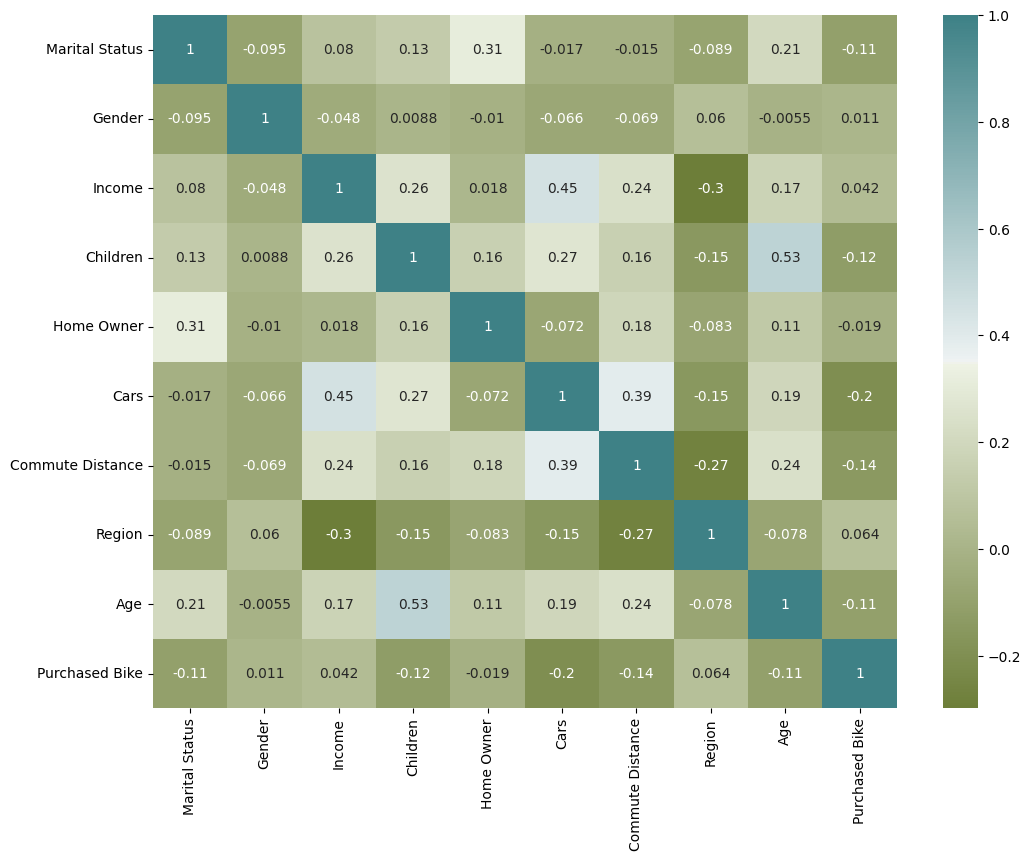

In [26]:
plt.figure(figsize=(12,9))
dataplot = sns.heatmap(data.corr(), cmap=sns.diverging_palette(100,200,as_cmap=True), annot=True)

plt.show()

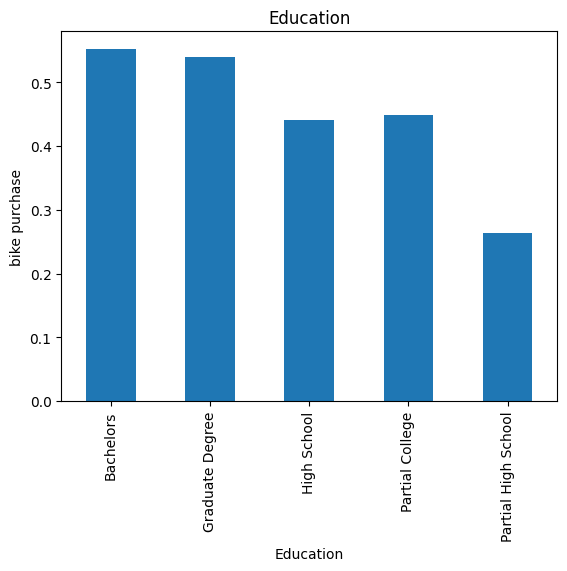

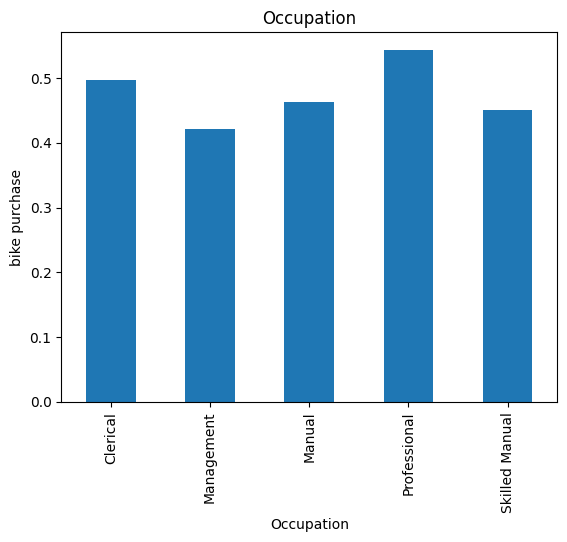

In [28]:
# Строим диаграммы зависимостей для оставшихся категориальных признаков и ЦП.
# Хотела посмотреть, нельзя ли их удалить. Дропать не буду, потому что зависимость все-таки есть (особенно в Education)

def show_bar(df, xcol):
    df[[xcol, 'Purchased Bike']].groupby(xcol).agg(np.mean).plot.bar(legend=False)
    plt.ylabel('bike purchase')
    plt.title(xcol)
    plt.show()

for col in data.columns:
    if col in ['Education', 'Occupation']:
      show_bar(data, col)

In [29]:
data = pd.get_dummies(data) # категориальные переводим в числовые при помощи OHE

In [30]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
y.value_counts() # выборка более сбалансированная, чем предыдущие

0    519
1    481
Name: Purchased Bike, dtype: int64

In [33]:
# Обучаем логистическую регрессию. Разница в результатах для классов 0 и 1 небольшая (выборка была солее сбалансированная)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       406
           1       0.62      0.65      0.63       344

    accuracy                           0.65       750
   macro avg       0.65      0.65      0.65       750
weighted avg       0.66      0.65      0.66       750
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       137
           1       0.58      0.61      0.60       113

    accuracy                           0.63       250
   macro avg       0.63      0.63      0.63       250
weighted avg       0.63      0.63      0.63       250



In [34]:
# Баланс классов изначально нормальный, но хотела сравнить, что получится, если все-таки сбалансировать - результат становится хуже.

model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       392
           1       0.62      0.63      0.63       358

    accuracy                           0.64       750
   macro avg       0.64      0.64      0.64       750
weighted avg       0.64      0.64      0.64       750
               precision    recall  f1-score   support

           0       0.61      0.62      0.61       130
           1       0.58      0.57      0.57       120

    accuracy                           0.59       250
   macro avg       0.59      0.59      0.59       250
weighted avg       0.59      0.59      0.59       250



In [35]:
# Не совсем понимаю, почему SVC очень долго считает. Попробовала отмасштабировать

scaler = StandardScaler().fit(X_train)
Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))